# Create figures to analyse the dataset and the prediction scores (on a fine grained level)

### Imports

In [15]:

import numpy as np
import sys
import os
import util_scripts.stats_utils as su
import util_scripts.analysis_utils as au
import compare_rankings as cr
sys.path.append('..')
# Add the project root directory
sys.path.append(os.path.abspath("../rule_based"))  # or the absolute path to your project

from rule_based.rule_dataset import RuleDataset
from rule_based.eval import evaluate



## User Input

In [16]:
dataset_name = 'tkgl-icews14'
rankings_filename = 'tkgl-icews14-rankings_test_conf_0_corr_conf_0_noisyor_crules_frules_zrules_pvalue_30_num_top_rules_10_multi.txt' # replace with name of your rankings file - 
# you can generate rankings using the counttrucola main.py. it will be stored in files/rankings/dataset_name/
# you can also use your own rankings file, as long as it is in the same format
# rankings format example:
# 25 13 ? 337
# 15 0.8158242432096148 44 0.5658675347599267 87 0.2962600387521216 ...
eval_mode ='test'
path_rankings_test = os.path.join('..', 'files', 'rankings', dataset_name, rankings_filename)


figs_dir = os.path.join('..', 'files', 'analysis', dataset_name)

if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)


## Figures and Stats
### Group 1: Dataset analysis figures

Figures and analysis in this section based on TGB 2.0

In [17]:
## read dataset and compute some stats
dataset =  RuleDataset(name=dataset_name)
stats_df, num_triples_dict, rel_df = su.compute_stats(dataset_name, dataset)
# stats_df

raw file found, skipping download
Dataset directory is  c:\Users\jgasting\PythonScripts\counttrucola\tgb/datasets\tkgl_icews14
loading processed file
num_rels:  230
>>> loading and indexing of dataset 3.555 seconds
>>> average number of time steps for a triple: 1.804
>>> checked order of time steps, everything is fine
tkgl-icews14 first timestamp: 2014-01-01 last timestamp: 2014-12-31
181460
>>> read 181460 triples from time 364 to 0
>>> read 14742 triples from time 364 to 334
DATATSET:  tkgl-icews14
all:       7371
previous:  776
sometime:  3860
f-direct (DRec):   0.10527743861077195
f-sometime (Rec): 0.5236738570071904
the mean number of timesteps that a triple appears in is 1.803956655731186
the median number of timesteps that a triple appears in is 1.0
the maximum number of timesteps that a triple appears in is 188
number of timesteps is 365
number of total triples is 90730
number of distinct triples is 50295
the mean max number of 100*consecutive timesteps/number of timesteps that

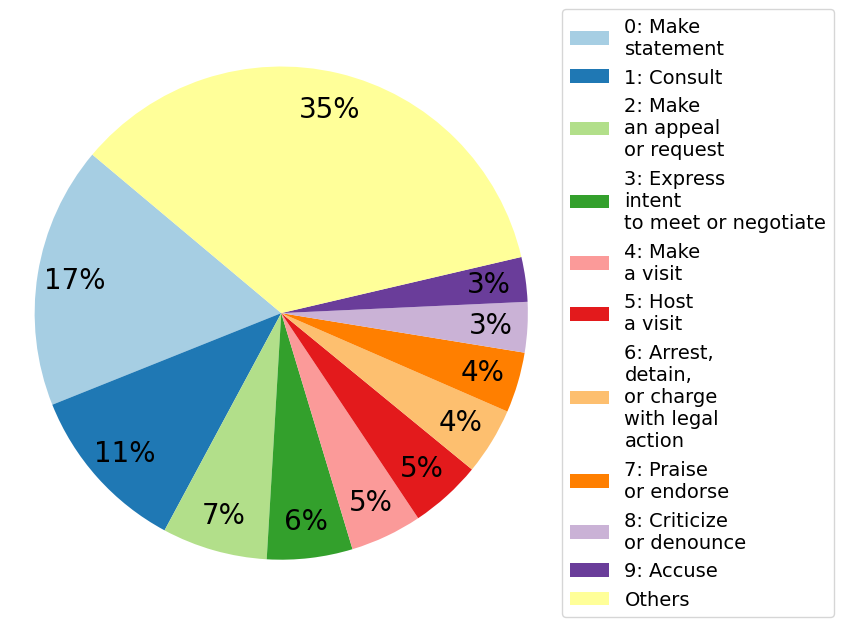

In [18]:
# plot a pie chart with the distribution of relations
au.plot_relation_pie(dataset, rel_df, figs_dir, dataset_name, num_slices=10)


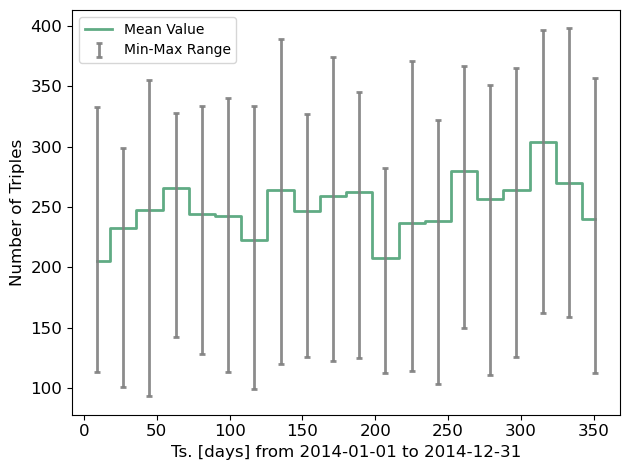

In [19]:
au.plot_edges_per_ts(stats_df, num_triples_dict, figs_dir, dataset_name)

### Group 2: Evaluation (fine grained)

In [20]:
## compute the mrr (per relation, per timestep from test set)
testmrr, testhits10, testhits1, testhits100, testmrrperrel, testhits1perrel, testmrrperts, testhits1perts =evaluate(dataset, path_rankings_test, progressbar_percentage=0.01, evaluation_mode=eval_mode, eval_type='random')


loading negative test samples
>>> starting evaluation for every triple, in the  test set


16506it [00:03, 4715.50it/s]                           


eval mode: test
mean mrr: 0.4499526288683277
mean hits@1: 0.35972052638719304
mean hits@10: 0.6210826210826211
mean hits@100: 0.7876136209469543
time to evaluate: 17.877125024795532


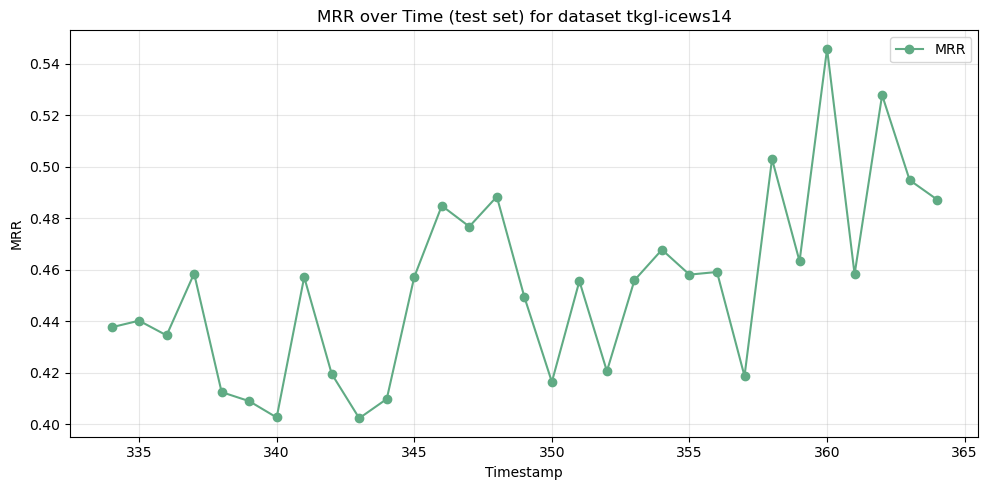

In [21]:
# plot the mrr per timestamp
au.plot_mrr_per_ts(testmrrperts, eval_mode, dataset_name, figs_dir)


saved in  ..\files\analysis\tkgl-icews14\rel_mrrperrel_occ_tkgl-icews14.png


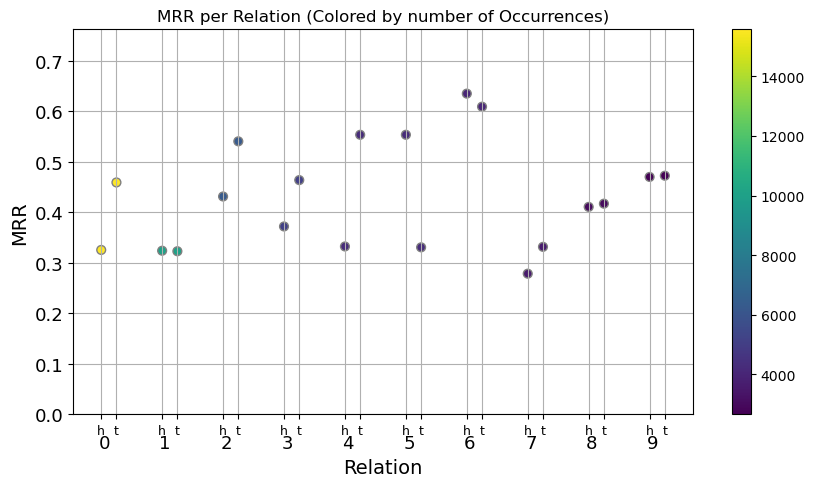

In [22]:
# plot the mrr per relation

# extend the rel_df with the mrr per relation
num_rels = dataset.num_rels

for rel in rel_df['relation']:
    if int(rel) in testmrrperrel:
        rel_df.loc[rel_df['relation'] == rel, 'tail'] = testmrrperrel[rel][0]
        inverse_rel = dataset.inverse_rel_dict[rel]
        rel_df.loc[rel_df['relation'] == rel, 'head'] = testmrrperrel[inverse_rel][0]

# colored and sorted by number of appearances
au.plot_mrr_per_relation(rel_df, figs_dir, dataset_name, num_rels_plot=10, head_tail_flag=True, mode='num_occurences')

# colored and sorted by recurrency degree
# au.plot_mrr_per_relation(rel_df, figs_dir, dataset_name, num_rels_plot=10, head_tail_flag=True, mode='recurrency_degree')